In [2]:
%matplotlib inline
from PIL import Image
import numpy as np
from matplotlib import pylab as plt
import math
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import cv2

V_M = np.linalg.norm([255,255,255])
C_M = np.linalg.norm([170,-85,-85])
GRAY = np.array([1,1,1])/math.sqrt(3)
X = np.array([170,-85,-85])
X = X/np.linalg.norm(X)
Y = np.array([255,510,0])/3-np.array([85,85,85])
Y = Y/np.linalg.norm(Y)
LABEL = {'null':1,'hair':2,'skin':3,'tops':4,'outer':5,'bottoms':6,'shoes':7,'misc':8}
max_chroma = np.linalg.norm([79,108])

LAYOUT = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    scene = dict(
    xaxis = dict(
        title='a'),
    yaxis = dict(
        title='b'),
    zaxis = dict(
        title='L'),))

In [3]:
def i_type(H,n,flag):
    if H[-1]>=66: return np.zeros((n))
    diff = (33-H)/10
    m = np.inf
    k = 0
    N = int((66-H[-1])/0.5)
    for i in range(N+1):
        t = np.sum(np.abs(diff)**2)
        if m>t:
            m = t
            k = i
        diff -= 0.05
    H_ = H+0.5*k
    if not(flag):
        score = np.ones((n))
        score[H_<30] = H_[H_<30]/30
        score[H_>36] = (66-H_[H_>36])/30
        return score
    else:
        h = 30
        m = np.inf
        p = 0
        N = int(6/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
            h += 0.5
        return 30+0.5*p-0.5*k

def V_type(H,n,flag):
    if H[-1]>=126: return np.zeros((n))
    diff = (63-H)/10
    m = np.inf
    k = 0
    N = int((126-H[-1])/0.5)
    for i in range(N+1):
        t = np.sum(np.abs(diff)**2)
        if m>t:
            m = t
            k = i
        diff -= 0.05
    H_ = H+0.5*k
    if not(flag):
        score = np.ones((n))
        score[H_<30] = H_[H_<30]/30
        score[H_>96] = (126-H_[H_>96])/30
        return score
    else:
        h = 30
        m = np.inf
        p = 0
        N = int(66/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
            h += 0.5
        return 30+0.5*p-0.5*k

def Ll_type(H,n,flag):
    if H[-1]>=171: return np.zeros((n))
    diff = np.vstack((48-H,138-H))/10
    m = np.inf
    k = 0
    N = int((171-H[-1])/0.5)
    for i in range(N+1):
        t = np.sum(np.min(np.abs(diff),axis=0)**2)
        if m>t:
            m = t
            k = i
        diff -= 0.05
    H_ = H+0.5*k
    score = np.zeros((n))
    index = H_<30
    score[index] = H_[index]/30
    index = np.logical_and(H_>=30,H_<=66)
    score[index] = 1
    index = np.logical_and(H_>66,H_<96)
    score[index] = (96-H_[index])/30
    index = np.logical_and(H_>105,H_<135)
    score[index] = (H_[index]-105)/30
    index = np.logical_and(H_>=135,H_<=141)
    score[index] = 1
    index = H_>141
    score[index] = (171-H_[index])/30
    if not(flag):
        return score
    else:
        h = 30
        m = np.inf
        p = 0
        N = int(36/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
            h += 0.5
        h = 135
        q = 0
        N = int(6/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
                q = 1
            h += 0.5
        return score,30+0.5*p+105*q-0.5*k

def Lr_type(H,n,flag):
    if H[-1]>=171: return np.zeros((n))
    diff = np.vstack((33-H,123-H))/10
    m = np.inf
    k = 0
    N = int((171-H[-1])/0.5)
    for i in range(N+1):
        t = np.sum(np.min(np.abs(diff),axis=0)**2)
        if m>t:
            m = t
            k = i
        diff -= 0.05
    H_ = H+0.5*k
    score = np.zeros((n))
    index = H_<30
    score[index] = H_[index]/30
    index = np.logical_and(H_>=30,H_<=36)
    score[index] = 1
    index = np.logical_and(H_>36,H_<66)
    score[index] = (66-H_[index])/30
    index = np.logical_and(H_>75,H_<105)
    score[index] = (H_[index]-75)/30
    index = np.logical_and(H_>=105,H_<=141)
    score[index] = 1
    index = H_>141
    score[index] = (171-H_[index])/30
    if not(flag):
        return score
    else:
        h = 30
        m = np.inf
        p = 0
        N = int(6/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
            h += 0.5
        h = 105
        q = 0
        N = int(36/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
                q = 1
            h += 0.5
        return score,30+0.5*p+75*q-0.5*k

def L_type(H,n,flag):
    if not(flag):
        scoreL = Ll_type(H,n,flag)
        scoreR = Lr_type(H,n,flag)
        if scoreL.prod()>scoreR.prod():
            return scoreL
        return scoreR
    else:
        scoreL,hL = Ll_type(H,n,flag)
        scoreR,hR = Lr_type(H,n,flag)
        if scoreL.prod()>scoreR.prod():
            return hL
        return hR

def I_type(H,n,flag):
    if H[-1]>=246 or H[-1]<66: return np.zeros((n))
    diff = np.vstack((33-H,213-H))/10
    m = np.inf
    k = 0
    N = int((246-H[-1])/0.5)
    for i in range(N+1):
        t = np.sum(np.min(np.abs(diff),axis=0)**2)
        if m>t:
            m = t
            k = i
        diff -= 0.05
    H_ = H+0.5*k
    if not(flag):
        score = np.zeros((n))
        index = H_<30
        score[index] = H_[index]/30
        index = np.logical_and(H_>=30,H_<=36)
        score[index] = 1
        index = np.logical_and(H_>36,H_<66)
        score[index] = (66-H_[index])/30
        index = np.logical_and(H_>180,H_<210)
        score[index] = (H_[index]-180)/30
        index = np.logical_and(H_>=210,H_<=216)
        score[index] = 1
        index = H_>216
        score[index] = (246-H_[index])/30
        return score
    else:
        h = 30
        m = np.inf
        p = 0
        N = int(6/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
            h += 0.5
        h = 210
        q = 0
        N = int(6/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
                q = 1
            h += 0.5
        return 30+0.5*p+180*q-0.5*k

def T_type(H,n,flag):
    if H[-1]>=216: return np.zeros((n))
    diff = (108-H)/10
    m = np.inf
    k = 0
    N = int((216-H[-1])/0.5)
    for i in range(N+1):
        t = np.sum(np.abs(diff)**2)
        if m>t:
            m = t
            k = i
        diff -= 0.05
    H_ = H+0.5*k
    if not(flag):
        score = np.ones((n))
        score[H_<30] = H_[H_<30]/30
        score[H_>186] = (216-H_[H_>186])/30
        return score
    else:
        h = 30
        m = np.inf
        p = 0
        N = int(156/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
            h += 0.5
        return 30+0.5*p-0.5*k

def Yl_type(H,n,flag):
    if H[-1]>=246 or H[-1]<96: return np.zeros((n))
    diff = np.vstack((48-H,213-H))/10
    m = np.inf
    k = 0
    N = int((246-H[-1])/0.5)
    for i in range(N+1):
        t = np.sum(np.min(np.abs(diff),axis=0)**2)
        if m>t:
            m = t
            k = i
        diff -= 0.05
    H_ = H+0.5*k
    score = np.zeros((n))
    index = H_<30
    score[index] = H_[index]/30
    index = np.logical_and(H_>=30,H_<=66)
    score[index] = 1
    index = np.logical_and(H_>66,H_<96)
    score[index] = (96-H_[index])/30
    index = np.logical_and(H_>180,H_<210)
    score[index] = (H_[index]-180)/30
    index = np.logical_and(H_>=210,H_<=216)
    score[index] = 1
    index = H_>216
    score[index] = (246-H_[index])/30
    if not(flag):
        return score
    else:
        h = 30
        m = np.inf
        p = 0
        N = int(36/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
            h += 0.5
        h = 210
        q = 0
        N = int(6/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
                q = 1
            h += 0.5
        return score,30+0.5*p+180*q-0.5*k

def Yr_type(H,n,flag):
    if H[-1]>=246 or H[-1]<66: return np.zeros((n))
    diff = np.vstack((33-H,198-H))/10
    m = np.inf
    k = 0
    N = int((246-H[-1])/0.5)
    for i in range(N+1):
        t = np.sum(np.min(np.abs(diff),axis=0)**2)
        if m>t:
            m = t
            k = i
        diff -= 0.05
    H_ = H+0.5*k
    score = np.zeros((n))
    index = H_<30
    score[index] = H_[index]/30
    index = np.logical_and(H_>=30,H_<=36)
    score[index] = 1
    index = np.logical_and(H_>36,H_<66)
    score[index] = (66-H_[index])/30
    index = np.logical_and(H_>150,H_<180)
    score[index] = (H_[index]-150)/30
    index = np.logical_and(H_>=180,H_<=216)
    score[index] = 1
    index = H_>216
    score[index] = (246-H_[index])/30
    if not(flag):
        return score
    else:
        h = 30
        m = np.inf
        p = 0
        N = int(6/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
            h += 0.5
        h = 180
        q = 0
        N = int(36/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
                q = 1
            h += 0.5
        return score,30+0.5*p+150*q-0.5*k

def Y_type(H,n,flag):
    if not(flag):
        scoreL = Yl_type(H,n,flag)
        scoreR = Yr_type(H,n,flag)
        if scoreL.prod()>scoreR.prod():
            return scoreL
        return scoreR
    else:
        scoreL,hL = Yl_type(H,n,flag)
        scoreR,hR = Yr_type(H,n,flag)
        if scoreL.prod()>scoreR.prod():
            return hL
        return hR

def X_type(H,n,flag):
    if H[-1]>=306 or H[-1]<126: return np.zeros((n))
    diff = np.vstack((63-H,243-H))/10
    m = np.inf
    k = 0
    N = int((306-H[-1])/0.5)
    for i in range(N+1):
        t = np.sum(np.min(diff**2,axis=0))
        if m>t:
            m = t
            k = i
        diff -= 0.05
    H_ = H+0.5*k
    if not(flag):
        score = np.zeros((n))
        index = H_<30
        score[index] = H_[index]/30
        index = np.logical_and(H_>=30,H_<=96)
        score[index] = 1
        index = np.logical_and(H_>96,H_<126)
        score[index] = (126-H_[index])/30
        index = np.logical_and(H_>180,H_<210)
        score[index] = (H_[index]-180)/30
        index = np.logical_and(H_>=210,H_<=276)
        score[index] = 1
        index = H_>276
        score[index] = (306-H_[index])/30
        return score
    else:
        h = 30
        m = np.inf
        p = 0
        N = int(66/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
            h += 0.5
        h = 210
        q = 0
        N = int(66/0.5)
        for i in range(N+1):
            t = np.sum(np.abs(h-H_)**2)
            if m>t:
                m = t
                p = i
                q = 1
            h += 0.5
        return 30+0.5*p+180*q-0.5*k

def N_type(C,n):
    score = np.zeros((n))
    score[C<=5] = 1
    index = np.logical_and(C>5,C<10)
    score[index] = (10-C[index])/10
    return score

In [4]:
def lowC(V,C,n,flag,Vs,Cs):
    if not(flag):
        score = np.zeros((n))
        index = C<=15
        score[index] = 1
        index = np.logical_and(C>15,C<35)
        score[index] = (35-C[index])/20
        return score
    else:
        index = Cs<=15
        Vs = Vs[index]
        Cs = Cs[index]
        #dis = Vs-Vs
        #for i in range(n):
        #    dis += np.sqrt((V[i]-Vs)**2+(C[i]-Cs)**2)
        #index = np.argmax(dis)
        Gv = np.mean(V)
        Gc = np.mean(C)
        dis = np.square(Vs-Gv)+np.square(Cs-Gc)
        index = np.argmin(dis)
        return Vs[index],Cs[index]

def midC(V,C,n,flag,Vs,Cs):
    if not(flag):
        score = np.zeros((n))
        index = np.logical_and(C>15,C<35)
        score[index] = (C[index]-15)/20
        index = np.logical_and(C>=35,C<=40)
        score[index] = 1
        index = np.logical_and(C>40,C<60)
        score[index] = (60-C[index])/20
        return score
    else:
        index = (Cs>=35)*(Cs<=40)
        Vs = Vs[index]
        Cs = Cs[index]
        Gv = np.mean(V)
        Gc = np.mean(C)
        dis = np.square(Vs-Gv)+np.square(Cs-Gc)
        index = np.argmin(dis)
        return Vs[index],Cs[index]

def highC(V,C,n,flag,Vs,Cs):
    if not(flag):
        score = np.zeros((n))
        index = np.logical_and(C>40,C<60)
        score[index] = (C[index]-40)/20
        index = C>=60
        score[index] = 1
        return score
    else:
        inde = Cs>=60
        Vs = Vs[index]
        Cs = Cs[index]
        Gv = np.mean(V)
        Gc = np.mean(C)
        dis = np.square(Vs-Gv)+np.square(Cs-Gc)
        index = np.argmin(dis)
        return Vs[index],Cs[index]

def triangle_(V,C,n,flag,Vs,Cs):
    if not(flag):
        score = np.zeros((n))
        l1 = 10*np.sqrt(45**2+100**2)/45
        l2 = 10*np.sqrt(max_chroma**2+100**2)/max_chroma
        line1 = 100/45*C
        line2 = 100/max_chroma*C
        Cp = (l1+l2)/(100*(max_chroma-45))*max_chroma*45
        Vp = 100/45*Cp-l1
        index = np.logical_and(V<=line1-l1,V>=line2+l2)
        score[index] = 1
        index = np.logical_and(V<line1+l1,V>line1-l1)
        score[index] = (line1[index]+l1-V[index])/(2*l1)
        index = np.logical_and(V<line2+l2,V>line2-l2)
        score[index] = (V[index]-line2[index]+l2)/(2*l2)
        dis1 = np.abs(V-Vp/Cp*C)/np.sqrt(1+(Vp/Cp)**2)/20
        dis2 = np.abs(V+Cp/Vp*C+Vp+Cp*Cp/Vp)/np.sqrt(1+(Cp/Vp)**2)/(2*np.sqrt(Vp**2+Cp**2))
        index = (dis2<1)*(dis1<dis2)
        score[index] = dis2[index]-dis1[index]
        return score
    else:
        line1 = 100/45*Cs - 10*np.sqrt(45**2+100**2)/45
        line2 = 100/max_chroma*Cs + 10*np.sqrt(max_chroma**2+100**2)/max_chroma
        index = (Vs<=line1)*(Vs>=line2)
        Vs = Vs[index]
        Cs = Cs[index]
        Gv = np.mean(V)
        Gc = np.mean(C)
        dis = np.square(Vs-Gv)+np.square(Cs-Gc)
        index = np.argmin(dis)
        return Vs[index],Cs[index]

def triangle(V,C,n,flag,Vs,Cs):
    if not(flag):
        score = np.zeros((n))
        l1 = 10*np.sqrt(45**2+100**2)/45
        l2 = 10*np.sqrt(max_chroma**2+100**2)/max_chroma
        line1 = 100-100/45*C
        line2 = 100-100/max_chroma*C
        Cp = (l1+l2)/(100*(max_chroma-45))*max_chroma*45
        Vp = 100/45*Cp-l1
        index = np.logical_and(V>=line1+l1,V<=line2-l2)
        score[index] = 1
        index = np.logical_and(V>line1-l1,V<line1+l1)
        score[index] = (V[index]-line1[index]+l1)/(2*l1)
        index = np.logical_and(V>line2-l2,V<line2+l2)
        score[index] = (line2[index]+l2-V[index])/(2*l2)
        dis1 = np.abs(V+(Vp/Cp)*C-100)/np.sqrt(1+(Vp/Cp)**2)/20
        dis2 = np.abs(V-(Cp/Vp)*C-100-Vp-Cp*Cp/Vp)/np.sqrt(1+(Cp/Vp)**2)/(2*np.sqrt(Vp**2+Cp**2))
        index = (dis2<1)*(dis1<dis2)
        score[index] = dis2[index]-dis1[index]
        return score
    else:
        line1 = 100-100/45*Cs + 10*np.sqrt(45**2+100**2)/45
        line2 = 100-100/max_chroma*Cs - 10*np.sqrt(max_chroma**2+100**2)/max_chroma
        index = (Vs>=line1)*(Vs<=line2)
        Vs = Vs[index]
        Cs = Cs[index]
        Gv = np.mean(V)
        Gc = np.mean(C)
        dis = np.square(Vs-Gv)+np.square(Cs-Gc)
        index = np.argmin(dis)
        return Vs[index],Cs[index]

def under(V,C,n,flag,Vs,Cs):
    if not(flag):
        score = np.zeros((n))
        dis = np.sqrt((V-100)**2+C**2)
        index = dis>=80
        score[index] = 1
        index = np.logical_and(dis>60,dis<80)
        score[index] = (dis[index]-60)/20
        return score
    else:
        dis = np.sqrt((Vs-100)**2+Cs**2)
        index = dis>=80
        Vs = Vs[index]
        Cs = Cs[index]
        Gv = np.mean(V)
        Gc = np.mean(C)
        dis = np.square(Vs-Gv)+np.square(Cs-Gc)
        index = np.argmin(dis)
        return Vs[index],Cs[index]

def above(V,C,n,flag,Vs,Cs):
    if not(flag):
        score = np.zeros((n))
        dis = np.sqrt(V**2+C**2)
        index = dis>=80
        score[index] = 1
        index = np.logical_and(dis>60,dis<80)
        score[index] = (dis[index]-60)/20
        return score
    else:
        dis = np.sqrt(Vs**2+Cs**2)
        index = dis>=80
        Vs = Vs[index]
        Cs = Cs[index]
        Gv = np.mean(V)
        Gc = np.mean(C)
        dis = np.square(Vs-Gv)+np.square(Cs-Gc)
        index = np.argmin(dis)
        return Vs[index],Cs[index]

def midV(V,C,n,flag,Vs,Cs):
    if not(flag):
        score = np.zeros((n))
        index = np.logical_and(V>25,V<45)
        score[index] = (V[index]-25)/20
        index = np.logical_and(V>=45,V<=55)
        score[index] = 1
        index = np.logical_and(V>55,V<75)
        score[index] = (75-V[index])/20
        return score
    else:
        index = (Vs>=35)*(Vs<=65)
        Vs = Vs[index]
        Cs = Cs[index]
        dis = Vs-Vs
        for i in range(n):
            dis += np.sqrt((V[i]-Vs)**2+(C[i]-Cs)**2)
        index = np.argmax(dis)
        return Vs[index],Cs[index]

def center(V,C,n,flag,Vs,Cs):
    if not(flag):
        score = np.zeros((n))
        line1 = 85-1/2*C
        line2 = 15+1/2*C
        l = 10*np.sqrt(5)/2
        index = (C>=30)*(C<=50)*(V>=line2+l)*(V<=line1-l)
        score[index] = 1
        index = (C>10)*(C<30)*(V>=30+l)*(V<=70-l)
        score[index] = (C[index]-10)/20
        index = (C>=30)*(C<=50)*(V>line1-l)*(V<line1+l)
        score[index] = (line1[index]+l-V[index])/(2*l)
        index = (C>=30)*(C<=50)*(V>line2-l)*(V<line2+l)
        score[index] = (V[index]-line2[index]+l)/(2*l)
        dis = np.sqrt((70-l-V)**2+(30-C)**2)
        index = (V>70-l)*(C<30)*(dis<20)
        score[index] = (20-dis[index])/20
        dis = np.sqrt((30+l-V)**2+(30-C)**2)
        index = (V<30+l)*(C<30)*(dis<20)
        score[index] = (20-dis[index])/20
        dis = np.sqrt((V-50)**2+(C-50)**2)
        index = np.logical_and(C>50,dis<20)
        score[index] = (20-dis[index])/20
        return score
    else:
        line1 = 85-1/2*Cs - 10*np.sqrt(5)/2
        line2 = 15+1/2*Cs + 10*np.sqrt(5)/2
        index = (C>=30)*(V>=line2)*(V<=line1)
        Vs = Vs[index]
        Cs = Cs[index]
        Gv = np.mean(V)
        Gc = np.mean(C)
        dis = np.square(Vs-Gv)+np.square(Cs-Gc)
        index = np.argmin(dis)
        return Vs[index],Cs[index]

In [5]:
def adaptable(H,VC):
    V = VC[:,0]
    C = VC[:,1]
    n = VC.shape[0]
    ### H_type
    scoreH = np.zeros((8,n))
    scoreH[0,:] = i_type(H,n,False)
    scoreH[1,:] = V_type(H,n,False)
    scoreH[2,:] = L_type(H,n,False)
    scoreH[3,:] = I_type(H,n,False)
    scoreH[4,:] = T_type(H,n,False)
    scoreH[5,:] = Y_type(H,n,False)
    scoreH[6,:] = X_type(H,n,False)
    scoreH[7,:] = N_type(C,n)
    
    sH = scoreH.prod(axis=1)
    sH[6] *= (1-sH[5])
    sH[5] *= (1-sH[3])
    sH[4] *= (1-np.max(sH[1:3]))
    sH[2] *= (1-sH[0])
    sH[1] *= (1-sH[0])
    ### VC_type
    scoreVC = np.zeros((10,n))
    sVC = np.zeros((10))
    scoreVC[0,:] = lowC(V,C,n,False,0,0)
    scoreVC[1,:] = midC(V,C,n,False,0,0)
    scoreVC[2,:] = highC(V,C,n,False,0,0)
    scoreVC[3,:] = above(V,C,n,False,0,0)
    scoreVC[4,:] = under(V,C,n,False,0,0)
    scoreVC[5,:] = triangle_(V,C,n,False,0,0)
    scoreVC[6,:] = triangle(V,C,n,False,0,0)
    scoreVC[7,:] = center(V,C,n,False,0,0)
    scoreVC[8,:] = midV(V,C,n,False,0,0)
    sVC[:10] = scoreVC.prod(axis=1)
    sVC[9] = 1-np.sum(sVC)
#     print('vc score')
#     print(scoreVC)
    ## score
    score = np.zeros((8))
    Mnum = np.zeros((8))
    num = np.array([[1,0,0,0,0,2,3,0,0,4],\
                    [1,0,0,0,0,2,3,0,0,0],\
                    [1,0,0,0,0,2,3,0,0,0],\
                    [0,0,1,0,0,2,3,4,0,0],\
                    [1,2,3,4,5,6,7,8,0,9],\
                    [0,0,1,0,0,2,3,4,0,5],\
                    [0,0,0,0,0,1,2,0,0,3],\
                    [1,0,0,0,0,0,0,0,0,0]])
    for i in range(8):
        VC = sVC[num[i,:]>0]
        Mnum[i] = list(num[i,:]).index(np.argmax(VC)+1)
        score[i] = sH[i]*np.max(VC)
    Mnum = np.uint(Mnum)
    m = np.argmax(score)
    return score[m],m,Mnum[m]

def sikisou(h,Mdiv):
    Vdiv = int(100/Mdiv)
    Cdiv = int(134/Mdiv)
    NN = (Vdiv+1)*(Cdiv+1)
    siki = np.zeros((NN,2))
    siki[:,0] = np.uint(np.arange(NN)/(Cdiv+1))*(100/Vdiv)
    siki[:,1] = (np.arange(NN)%(Cdiv+1))*(134/Cdiv)

    lab = np.zeros((NN,3))
    lab[:,0] = siki[:,0]*(255/100)
    lab[:,1] = siki[:,1]*np.cos(h*np.pi/180)+128
    lab[:,2] = siki[:,1]*np.sin(h*np.pi/180)+128
    
    lab = np.reshape(np.uint8(np.round(lab)),(1,NN,3))
    rgb = cv2.cvtColor(lab,cv2.COLOR_LAB2RGB)
    lab = cv2.cvtColor(rgb,cv2.COLOR_RGB2LAB)
    lab = np.reshape(np.float64(lab),(NN,3))
    lab[:,1:] -= 128
    C = np.sqrt(np.sum(lab[:,1:]**2,axis=1))
    index = C>0
    lab[index,1] /= C[index]
    lab[index,2] /= C[index]
    cos = -lab[:,1]
    sin = -lab[:,2]
    cos[cos<-1] = -1
    cos[cos>1] = 1
    sin[sin>=0] = 1
    sin[sin<0] = -1
    H = sin*np.arccos(cos)*(180/np.pi)+180
    Hdiff = np.min(np.vstack((np.abs(h-H),np.abs(np.abs(h-H)-360))),axis=0)
    F = (siki[:,1]>10)* ( (Hdiff<1)*(np.abs(C-siki[:,1])<1)+
         (siki[:,1]<60)*(Hdiff<(0.1*60*(1-siki[:,1]/60)**3+1))*(np.abs(C-siki[:,1])<(0.01*60*(1-siki[:,1]/60)**3+1)) )
    siki = siki[F,:]
    return siki[:,0],siki[:,1]

def LabtoHVC(lab):
    hvc = lab-lab
    hvc[:,1] = lab[:,0]
    hvc[:,2] = np.sqrt(np.sum(lab[:,1:]**2,axis=1))
    index = hvc[:,2]>0
    cos = -lab[:,1]
    sin = -lab[:,2]
    cos[index] /= (hvc[:,2])[index]
    cos[cos<-1] = -1
    cos[cos>1] = 1
    sin[sin>=0] = 1
    sin[sin<0] = -1
    hvc[:,0] = sin*np.arccos(cos)*(180/np.pi)+180
    return hvc

def recColor(H,VC,Hnum,VCnum,h0):
    n = VC.shape[0]
    Mdiv = 0.5
    V = VC[:,0]
    C = VC[:,1]
    if Hnum==0:
        h = i_type(H,n,True)
        print("i type")
    elif Hnum==1:
        h = V_type(H,n,True)
        print("V type")
    elif Hnum==2:
        h = L_type(H,n,True)
        print("L type")
    elif Hnum==3:
        h = I_type(H,n,True)
        print("I type")
    elif Hnum==4:
        h = T_type(H,n,True)
        print("T type")
    elif Hnum==5:
        h = Y_type(H,n,True)
        print("Y type")
    elif Hnum==6:
        h = X_type(H,n,True)
        print("X type")
    elif Hnum==7:
        print("N type")
        print("lowC")
        return np.array([0,np.mean(V),0])
    h += h0
    if h>360: h -= 360
    Vs,Cs = sikisou(h,Mdiv)
    if VCnum==0:
        v,c = lowC(V,C,n,True,Vs,Cs)
        print("lowC")
    elif VCnum==1:
        v,c = midC(V,C,n,True,Vs,Cs)
        print("midC")
    elif VCnum==2:
        v,c = highC(V,C,n,True,Vs,Cs)
        print("highC")
    elif VCnum==3:
        v,c = above(V,C,n,True,Vs,Cs)
        print("above")
    elif VCnum==4:
        v,c = under(V,C,n,True,Vs,Cs)
        print("under")
    elif VCnum==5:
        v,c = triangle_(V,C,n,True,Vs,Cs)
        print("triangle_")
    elif VCnum==6:
        v,c = triangle(V,C,n,True,Vs,Cs)
        print("triangle")
    elif VCnum==7:
        v,c = center(V,C,n,True,Vs,Cs)
        print("center")
    elif VCnum==8:
        v,c = midV(V,C,n,True,Vs,Cs)
        print("midV")
    elif VCnum==9:
        print("all")
        Gv = np.mean(V)
        Gc = np.mean(C)
        dis = np.square(Vs-Gv) + np.square(Cs-Gc)
        index = np.argmin(dis)
        #dis = Vs-Vs
        #for i in range(n):
        #    dis += np.sqrt((V[i]-Vs)**2+(C[i]-Cs)**2)
        #index = np.argmax(dis)
        v = Vs[index]
        c = Cs[index]
    return np.array([h,v,c])

def RGBtoHVC(rgb):
    lab = np.uint8(np.round(rgb))
    lab = np.reshape(lab,(1,1,3))
    lab = cv2.cvtColor(lab,cv2.COLOR_RGB2LAB)
    lab = np.float64(lab)
    lab = np.reshape(lab,(3))
    lab[0] *= 100/255
    lab[1:] -= 128
    V = lab[0]
    C = np.sqrt(np.sum(lab[1:]**2))
    if C==0:
        return np.array([0,V,C])
    cos = -lab[1]/C
    sin = -lab[2]/C
    if cos<-1 : cos = -1
    elif cos>1 : cos = 1
    H = np.arccos(cos)*180/np.pi
    sign = 1 if sin >= 0 else -1
    return np.array([sign*H+180, V, C])

def HVCtoLab(hvc):
    lab = hvc.copy()
    lab[0] = hvc[1]
    lab[1] = hvc[2]*np.cos(hvc[0]*np.pi/180)
    lab[2] = hvc[2]*np.sin(hvc[0]*np.pi/180)
    return lab

def sortH(Hs,num):
    n = len(num)
    color = num.copy()
    Hdiff = np.array([Hs[i+1]-Hs[i] for i in range(0,n-1)])
    l_ = 360-np.sum(Hdiff)
    m = np.max(Hdiff)
    if m>l_:
        i = np.argmax(Hdiff)
        tmp = Hdiff[:i].copy()
        Hdiff[:n-i-2] = Hdiff[i+1:]
        Hdiff[n-i-2] = l_
        Hdiff[n-i-1:] = tmp
        tmp = color[:i+1].copy()
        color[:n-i-1] = color[i+1:]
        color[n-i-1:] = tmp
    H_ = np.array([np.sum(Hdiff[:i]) for i in range(n)])
    return H_,color

def recommendation(lab):
    hvc = LabtoHVC(lab)
    print("HVC :\n",hvc)
    n = hvc.shape[0]
    num = np.arange(n)
    H = hvc[:,0].copy()
    sort = np.argsort(H)
    hvc = hvc[sort,:]
    num = num[sort]
    score = 0
    Hnum = 0
    VCnum = 0
    k = 0
    H_,num_ = sortH(hvc[:,0],num)
    print(adaptable(H_,hvc[:,1:]))
    for i in range(n):
        index = (num!=i)
        H_,num_ = sortH(hvc[index,0],num[index])
        tmp1,tmp2,tmp3 = adaptable(H_,hvc[index,1:])
        print(tmp1,tmp2,tmp3)
        if score<=tmp1:
        #if i==1:
            score = tmp1
            Hnum = tmp2
            VCnum = tmp3
            k = i
    index = (num!=k)
    H_,num_ = sortH(hvc[index,0],num[index])
    rec_hvc = recColor(H_,hvc[index,1:],Hnum,VCnum,H[num_[0]])
    print("recommend",rec_hvc)
    rec_lab = HVCtoLab(rec_hvc)
    return k,rec_lab

In [6]:
def toLab(rgb):
    lab = np.uint8(np.round(rgb))
    size = lab.shape
    flag1 = len(size)==2
    flag2 = len(size)==1
    if flag1:
        lab = np.reshape(lab,(1,size[0],3))
    elif flag2:
        lab = np.reshape(lab,(1,1,3))
    lab = cv2.cvtColor(lab,cv2.COLOR_RGB2LAB)
    lab = np.float64(lab)
    if flag1:
        lab = np.reshape(lab,(size[0],3))
    elif flag2:
        lab = np.reshape(lab,(3))
    return lab

def toRGB(lab):
    rgb = lab.copy()
    size = rgb.shape
    flag1 = len(size)==2
    flag2 = len(size)==1
    if flag1:
        rgb = np.reshape(rgb,(1,size[0],3))
    if flag2:
        rgb = np.reshape(rgb,(1,1,3))
    rgb[:,:,0] *= 255/100
    rgb[:,:,1:] += 128
    rgb = np.uint8(np.round(rgb))
    rgb = cv2.cvtColor(rgb,cv2.COLOR_LAB2RGB)
    if flag1:
        rgb = np.reshape(rgb,(size[0],3))
    if flag2:
        rgb = np.reshape(rgb,(3))
    return rgb

def divRGBcnv(M_lab,N,Lab):
    M = 255/N
    rgb = np.zeros((N**3,3))
    for r in range(N):
         for g in range(N):
                for b in range(N):
                    rgb[r*N**2+g*N+b,:] = [r*M,g*M,b*M]
    rgb = np.round(rgb)
    lab_ = toLab(rgb)
    for n in range(N**3):
        [l,a,b] = np.uint(np.round(lab_[n,:]/M_lab))
        Lab[l,a,b,:] = rgb[n,:]
    return Lab

def color_feature(vec):
    V = np.sum(GRAY*vec)
    vec_x = vec-V*GRAY
    V = V/V_M*100
    C = np.linalg.norm(vec_x)
    if not(C==0.):
        vec_x = vec_x/C
    C = C/C_M*100
    cos = np.sum(vec_x*X)
    if cos<=-1.0: cos=-1
    elif cos>=1.0: cos=1
    H = math.acos(cos)*180/math.pi
    sign = 1 if np.sum(vec_x*Y) >= 0 else -1
    return [V,C,sign*H]

def color_vec(feature):
    [V,C,H] = feature
    V = V/100*V_M
    C = C/100*C_M
    #if V<C: return None
    H_vec = math.cos(H/180*math.pi)*X + math.sin(H/180*math.pi)*Y
    color = H_vec*C + V*GRAY
    return color

def max_chroma1(H,flag):
    if flag:
        c = 255/(H[0]-H[2])
        x = -c*H[2]
    else:
        c = 255/(H[1]-H[2])
        x = -c*H[2]
    return math.sqrt(3*x**2)
    
def max_chroma2(H,V):
    V = V/100*V_M
    H = (H+1)%120-1
    flag = H<60
    H = math.cos(H/180*math.pi)*X + math.sin(H/180*math.pi)*Y
    Vthr = max_chroma1(H,flag)
    if V>Vthr:
        if flag:
            C = (255-V*GRAY[0])/H[0]
        else:
            C = (255-V*GRAY[1])/H[1]
    else:
        C = -V*GRAY[2]/H[2]
    return C/C_M*100

def func1(X):
    return X

def change_item_color(image,Lmap,G1_feature,G2_feature,f_gray):
    [V1,C1,H1] = G1_feature
    [V2,C2,H2] = G2_feature
    C1 = C1/100
    C2 = C2/100
    #if C2>0.85: C2 = 0.85+(func3((C2-0.85)/0.25))*0.25
    V1 = V1/100
    V2 = V2/100
    I,J = np.where(Lmap==True)
    N = len(I)
    V = np.zeros(N)
    V_ = V.copy()
    C = V.copy()
    C_ = V.copy()
    H = V.copy()
    CM = V.copy()
    for n in range(N):
        [V_[n],C_[n],H[n]] = color_feature(image[I[n],J[n],:])        
        if C_[n]<0.1 and V_[n]>2 and V_[n]<98: C_[n] += 1
    if f_gray:
        H = H*5/180 + H2
    else:
        H += H2-H1
    V_ = V_/100
    Vind1 = V_<=V1
    Vx1 = 1-V_[Vind1]/V1
    Vind2 = V_>V1
    Vx2 = (V_[Vind2]-V1)/(1-V1)
    
    C_ = C_/100
    Cind1 = C_<=C1
    Cx1 = 1-C_[Cind1]/C1
    Cind2 = C_>C1
    Cx2 = (C_[Cind2]-C1)/(1-C1)
    
    V[Vind1] = 100 * V2 * ( 1-( func1( Vx1 ) if V2>=V1 else func1( Vx1 ) ) ) ### lower , upper
    V[Vind2] = 100 * (V2+(1-V2)*( func1( Vx2 ) if V2>=V1 else func1( Vx2 ) ) ) ### upper , lower
    
    for n in range(N):
        CM[n] = max_chroma2(H[n],V[n])
    C[Cind1] = 100 * C2 * ( 1-( func1( Cx1 ) if C2>=C1 else func1( Cx1 ) ) )
    C[Cind2] = 100 * (C2+(1-C2)*( func1( Cx2 ) if C2>=C1 else func1( Cx2 ) ) )
    C[C>CM] = CM[C>CM]

    pixel = np.zeros((N,3))
    for n in range(N):
        color = color_vec([V[n],C[n],H[n]])
        if color is None:
            print("null",image[I[n],J[n],:])
            continue
        color = np.round(color)
        if np.sum(color<-5):
            print("over -5",image[I[n],J[n],:])
        color[color<0] = 0
        if np.sum(color>260):
            print("over 260",image[I[n],J[n],:])
        color[color>255] = 0
        image[I[n],J[n],:] = color
        pixel[n,:] = color
    return image,pixel

def ext_pixel(image,Lmap,l):
    I,J = np.where(Lmap==l)
    N = len(I)
    pixel = np.zeros((N,3))
    for n in range(N):
        pixel[n,:] = image[I[n],J[n],:]
    return pixel

def ext_max(rgb,size,M):
    sort = np.argsort(-size)[:M]
    return rgb[sort],size[sort]

def color_distribution(pix,N):
    M = 255/(N-1)
    dist = np.zeros((N,N,N))
    pix = toLab(pix)
    for i in range(pix.shape[0]):
        [l,a,b] = np.uint(np.round(pix[i,:]/M))
        dist[l,a,b] += 1
    L,A,B = np.where(dist>0)
    lab = np.zeros((len(L),3))
    size = np.zeros(len(L))
    for n in range(len(L)):
        l,a,b = L[n],A[n],B[n]
        lab[n] = [l,a,b]
        size[n] = dist[l,a,b]
    lab = np.round(lab*M)
    lab[:,0] *= 100/255
    lab[:,1:] -= 128
    return lab,size

def color_distributionRGB(pix,N):
    M = 255/(N-1)
    dist = np.zeros((N,N,N))
    for i in range(pix.shape[0]):
        [r,g,b] = np.uint(np.round(pix[i,:]/M))
        dist[r,g,b] += 1
    R,G,B = np.where(dist>0)
    rgb = np.zeros((len(R),3))
    size = np.zeros(len(R))
    for n in range(len(R)):
        r,g,b = R[n],G[n],B[n]
        rgb[n] = [r,g,b]
        size[n] = dist[r,g,b]
    rgb = np.round(rgb*M)
    return rgb,size

def cent_dist(lab,size):
    size_ = np.reshape(size,(size.shape[0],1))
    size_ = np.tile(size_,(1,3))
    G = np.sum(lab*size_,0)/np.sum(size_,0)
    return G

def show_dist(lab,size,item,M):
    if not(lab.size): return
    color = toRGB(lab)
    img = np.uint8(np.zeros((50,200,3))+255)
    space = np.uint8(np.zeros((50,50,3))+255)
    for i in range(M):
        tmp = np.array([[color[i,:]]])
        tmp = np.tile(tmp,(50,50,1))
        tmp = np.hstack((tmp,space))
        img = np.hstack((img,tmp))
    plt.figure(figsize=(100,1))
    plt.imshow(img)
    plt.text(10,36,item+" :",fontdict={"fontsize":40})
    per = size/sum(size)*100
    for i in range(M):
        plt.text(260+100*i,18,("%.1f%%"%per[i]).rjust(4),fontdict={"fontsize":12})
        plt.text(260+100*i,36,("%d"%size[i]).rjust(4),fontdict={"fontsize":12})
    plt.show()

def show_change(cent,recom,item):
    cent = np.reshape(cent,(1,1,3))
    recom = np.reshape(recom,(1,1,3))
    cent = np.uint8(np.tile(cent,(50,50,1)))
    recom = np.uint8(np.tile(recom,(50,50,1)))
    img = np.uint8(np.zeros((50,200,3))+255)
    space = np.uint8(np.zeros((50,50,3))+255)
    img = np.hstack((img,cent,space,recom))
    plt.figure(figsize=(100,1))
    plt.imshow(img)
    plt.text(10,36,item+" :",fontdict={"fontsize":40})
    plt.text(260,36,">",fontdict={"fontsize":40})
    plt.show()

In [12]:
def around(div1,div2):
    s = int(div2/6)
    inc = np.arange(s)/s*255
    dec = inc[::-1]
    ry = np.zeros((s,3))
    ry[:,0] = 255
    ry[:,1] = inc
    yg = np.zeros((s,3))
    yg[:,0] = dec
    yg[:,1] = 255
    gc = np.zeros((s,3))
    gc[:,1] = 255
    gc[:,2] = inc
    cb = np.zeros((s,3))
    cb[:,1] = dec
    cb[:,2] = 255
    bm = np.zeros((s,3))
    bm[:,0] = inc
    bm[:,2] = 255
    mr = np.zeros((s,3))
    mr[:,0] = 255
    mr[:,2] = dec
    around = np.vstack([ry,yg,gc,cb,bm,mr])
    lab = toLab(around)
    lab[:,0] *= 100/255
    lab[:,1:] -= 128
    sign = -lab[:,2]
    sign[sign>=0] = 1
    sign[sign<0] = -1
    angle = sign*np.arccos(-lab[:,1]/np.linalg.norm(lab[:,1:],axis=1))*180/np.pi+180
    
    sort = np.argsort(angle)
    around = around[sort,:]
    angle = angle[sort]

    around = np.vstack((around[-1,:],around,around[0,:]))
    angle = np.hstack((angle[-1]-360,angle,angle[0]+360))

    dd = np.diff(angle)
    out = np.where(dd<=0)[0]+1
    around = np.delete(around,out,0)
    angle = np.delete(angle,out)
    
    p = 0
    color = np.zeros((div1,3))
    for i in range(div1):
        a = i*360/div1
        while a>=angle[p+1]:
            p += 1
        d = (a-angle[p])/(angle[p+1]-angle[p])
        color[i,:] = (1-d)*around[p,:]+d*around[p+1,:]
    color /= 255
    color[color>1] = 1
    return color

def plot_dist(dist,N,div,color):
    N = np.array(N)
    mx = max(list(map(lambda x: max(x),dist)))
    plt.figure(figsize=(10,10))
    plt.tick_params(labelbottom="off",bottom="off")
    plt.tick_params(labelleft="off",left="off")
    plt.xticks([])
    ax = plt.gca()
    ax.spines["right"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_color("none")
    plt.scatter(0,0,s=100+100000*np.mean(N)**2,color=[0,0,0])
    z = np.arange(div)*np.pi*2/div
    xx = []
    yy = []
    for d in dist:
        d = d/mx
        x1 = np.cos(z)
        x2 = x1*0.8*(1-0.8*d)
        y1 = np.sin(z)
        y2 = y1*0.8*(1-0.8*d)
        for i in range(div):
            plt.plot([x2[i],x1[i]],[y2[i],y1[i]],linewidth=1,color=color[i,:])
        xx.append(x2)
        yy.append(y2)
    
    for i in range(len(dist)):
        plt.plot(xx[i],yy[i],linewidth=0.5,color=[0.7,0.7,0.7])
        
    plt.plot(x1,y1,linewidth=1,color=[0,0,0])
    plt.plot(x1*0.8,y1*0.8,linewidth=1,color=[0,0,0])
#     plt.savefig('sikisou'+t+'.png')
    plt.show()
    
def plot_sikisou(point,area,div,color,item):
    z = np.arange(div)*np.pi*2/div
    x1 = np.cos(z)
    x2 = x1*0.8
    y1 = np.sin(z)
    y2 = y1*0.8
    plt.figure(figsize=(10,10))
    plt.tick_params(labelbottom="off",bottom="off")
    plt.tick_params(labelleft="off",left="off")
    plt.xticks([])
    ax = plt.gca()
    ax.spines["right"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_color("none")
    for i in range(div):
        plt.plot([x2[i],x1[i]],[y2[i],y1[i]],linewidth=1,color=color[i,:])
        
    div = int(div*5/6)
    xx = []
    yy = []
    for i in range(len(area)):
        div2 = int(div*area[i]/360)
        z = (np.arange(div2)/div2*area[i]+point[i])/180*np.pi
        x = np.cos(z)*0.8
        y = np.sin(z)*0.8
        for j in range(1,div2-1):
            plt.plot([0,x[j]],[0,y[j]],linewidth=1,color=[0.7,0.7,0.7,0.5])
        xx.append([x[0],x[-1]])
        yy.append([y[0],y[-1]])
#         plt.text(x[int(div2/2)]*1.3,y[int(div2/2)]*1.3,item[i],fontdict={"fontsize":10})
    for i in range(len(area)):
        plt.plot([0,xx[i][0]],[0,yy[i][0]],linewidth=1,color=[0,0,0])
        plt.plot([0,xx[i][-1]],[0,yy[i][-1]],linewidth=1,color=[0,0,0])

    plt.plot(x1,y1,linewidth=1,color=[0,0,0])
    plt.plot(x2,y2,linewidth=1,color=[0.2,0.2,0.2])
    plt.plot(0,0,'o',linewidth=20,color=[0,0,0])
    plt.show()
    
def plot_sikityou(vc,rgb,item):
    plt.figure(figsize=(max_chroma/20,5))
    plt.tick_params(labelbottom='off',bottom='off')
    plt.tick_params(labelleft='off',left='off')
    plt.xticks([])
    plt.xlim(0,max_chroma)
    plt.ylim(0,100)
    for i in range(len(item)):
        plt.scatter(vc[i,1],vc[i,0],s=100,color=rgb[i,:]/255)
    plt.show()
    
def hue_dist(pix,div):
    lab = toLab(pix)
    lab[:,0] *= 100/255
    lab[:,1:] -= 128
    idx = np.logical_not((lab[:,1]==0)*(lab[:,2]==0))
    idx = np.linalg.norm(lab[:,1:],axis=1)>10
    N = 1-np.sum(idx)/lab.shape[0]
    lab = lab[idx,:]
    sign = -lab[:,2]
    sign[sign>=0] = 1
    sign[sign<0] = -1
    xx = -lab[:,1]/np.linalg.norm(lab[:,1:],axis=1)
    xx[xx>1] = 1
    xx[xx<-1] = -1
    angle = sign*np.arccos(xx)*180/np.pi+180
    angle = np.ceil(angle)
    
    q = int(15/360*div)
    dist = np.zeros(div)
    for i in angle:
        dist[int(i*div/360)-1] += 1
    dist = dist/np.sum(dist)
    ddd = np.zeros(div+2*q)
    p = (np.arange(q)/q)**(8)
    p = np.hstack((p,[1],p[::-1]))
    dist = np.hstack((dist[-q:],dist,dist[:q]))
    for d in range(q+1,div+q+1):
        ddd[d-q-1:d+q] += dist[d]*p
    ddd[q+1:2*q+1] += ddd[-q:]
    ddd[-2*q:-q] += ddd[:q]
    ddd = ddd[q:-q]
    plt.plot(ddd)
    plt.show()
    return ddd,N

In [13]:
def data_plotly(lab,size,name):
    rgb = toRGB(lab)
    if "Centroid" in name:
        Pcol = "rgb(%d,%d,%d)"%(rgb[0],rgb[1],rgb[2])
        data = [go.Scatter3d(x=[lab[1]], y=[lab[2]], z=[lab[0]], name=name, mode='markers',\
                             marker=dict(size=20,color=Pcol))]
    else:
        lab_ = lab.copy()
        Pcol = list(map(lambda x: "rgb(%d,%d,%d)"%(x[0],x[1],x[2]), rgb))
        data = [go.Scatter3d(x=lab_[:,1], y=lab_[:,2], z=lab_[:,0], name=name, mode='markers',\
                             marker=dict(size=24*np.log1p(size)/np.log1p(np.max(size)),color=Pcol))]
    return data

def data_plotlyRGB(rgb,size,name):
    if "Centroid" in name:
        rgb_ = toRGB(rgb)
        Pcol = "rgb(%d,%d,%d)"%(rgb_[0],rgb_[1],rgb_[2])
        data = [go.Scatter3d(x=[rgb_[1]], y=[rgb_[2]], z=[rgb_[0]], name=name, mode='markers',\
                             marker=dict(size=20,color=Pcol))]
    else:
        Pcol = list(map(lambda x: "rgb(%d,%d,%d)"%(x[0],x[1],x[2]), rgb))
        data = [go.Scatter3d(x=rgb[:,1], y=rgb[:,2], z=rgb[:,0], name=name, mode='markers',\
                             marker=dict(size=24*np.log1p(size)/np.log1p(np.max(size)),color=Pcol))]
    return data

def frame():
    #rgb = np.array([[255,0,0],[255,255,0],[0,255,0],[0,255,255],[0,0,255],[255,0,255],[255,0,0],
    #               [0,0,0],[255,255,0],[255,255,255],[0,255,0],[0,0,0],[0,255,255],[255,255,255],
    #               [0,0,255],[0,0,0],[255,0,255],[255,255,255],[255,0,0],[0,0,0],[255,255,255]])
    rgb = np.array([[255,255,255],[255,0,255],[0,0,255],[0,255,255],
                    [255,255,255],[0,255,255],[0,255,0],[255,255,0],
                    [255,255,255],[255,255,0],[255,0,0],[255,0,255],[255,255,255],
                    [0,0,0],[255,0,0],[255,0,255],[0,0,255],
                    [0,0,0],[0,0,255],[0,255,255],[0,255,0],
                    [0,0,0],[0,255,0],[255,255,0],[255,0,0]])
    lab = toLab(rgb)
    lab[:,0] *= 100/255
    lab[:,1:] -= 128
    Pcol = list(map(lambda x: "rgb(%d,%d,%d)"%(x[0],x[1],x[2]),rgb))
    data = [go.Scatter3d(x=lab[:,1], y=lab[:,2], z=lab[:,0], name="frame", \
                         line=dict(width=3,color="rgb(0,0,0)"), marker=dict(size=5,color=Pcol))]
    return data

def frameRGB():
    rgb = np.array([[255,255,255],[255,0,255],[0,0,255],[0,255,255],
                    [255,255,255],[0,255,255],[0,255,0],[255,255,0],
                    [255,255,255],[255,255,0],[255,0,0],[255,0,255],[255,255,255],
                    [0,0,0],[255,0,0],[255,0,255],[0,0,255],
                    [0,0,0],[0,0,255],[0,255,255],[0,255,0],
                    [0,0,0],[0,255,0],[255,255,0],[255,0,0]])
    Pcol = list(map(lambda x: "rgb(%d,%d,%d)"%(x[0],x[1],x[2]),rgb))
    data = [go.Scatter3d(x=rgb[:,1], y=rgb[:,2], z=rgb[:,0], name="frame", \
                         line=dict(width=3,color="rgb(0,0,0)"), marker=dict(size=10,color=Pcol))]
    return data

def disp_color(lab):
    rgb = toRGB(lab)
    rgb = np.reshape(rgb,(1,1,3))
    plt.figure(figsize=(1,1))
    plt.imshow(rgb)
    plt.show()
    
def excution2(image,Lmap,div_N,max_N,gray_thr):
    Lflag = np.array([np.sum(Lmap==i) for i in range(1,9)])
    data = []
    data.extend(frameRGB())
    keys = list(LABEL.keys())
    G = np.zeros((1,3))
    S = np.zeros(1)
    maps = Lmap>0
    maps = np.reshape(maps,(1,maps.shape[0],maps.shape[1]))
    items = np.array([""])
    distribution = []
    N = []
    color = around(1800,180)
    for k in keys[3:]:
        label = LABEL[k]
        if Lflag[label-1]<100:
            continue
        pixel = ext_pixel(image,Lmap,label)
        maps = np.vstack((maps,np.reshape(Lmap==label,(1,600,400))))
        items = np.append(items,k)
        lab,size = color_distribution(pixel,div_N+1)
        rgb,size2 = color_distributionRGB(pixel,div_N+1) ##
        s = np.sum(size)
        s2 = np.sum(size2) ##
        
        dist,n = hue_dist(pixel,1800)
        print(n)
#         plot_dist([dist],[n],1800,color)
        distribution.append(dist)
        N.append(n)

#         data.extend(data_plotly(lab,size,k+": maxN"))
        data.extend(data_plotlyRGB(rgb,size,k+": maxN")) ##
        lab,size = ext_max(lab,size,max_N)
        rgb,size2 = ext_max(rgb,size2,max_N) ##
        show_dist(lab,size,k,max_N)
        g = cent_dist(lab,size)
#         data.extend(data_plotly(g,1,k+": Centroid"))
        data.extend(data_plotlyRGB(g,1,k+": Centroid")) ##
        print(g,s)
        disp_color(g)
        G = np.append(G,[g],axis=0)
        S = np.append(S,s)
        
#     plot_dist(distribution,N,1800,color)
    
    G = G[1:,:]
    print("Lab :\n",G)
    S = S[1:]
    maps = maps[1:,:,:]
    items = items[1:]
    
    G_hvc = LabtoHVC(G)
    plot_sikisou(G_hvc[:,0]-10,[20]*G.shape[0],1800,color,items)
    
    k,G2_lab = recommendation(G)
    G2_rgb = toRGB(G2_lab)
    
    plot_sikityou(G_hvc[:,1:],toRGB(G),items)
    
    G2_f = color_feature(G2_rgb)
#     data.extend(data_plotly(G2_lab,1,"Centroid_2"))
    data.extend(data_plotlyRGB(G2_lab,1,"Centroid_2")) ##
    G1_lab = G[k,:]
    G1_rgb = toRGB(G1_lab)
    G1_f = color_feature(G1_rgb)
    item = items[k]
    print("G1 lab :",G1_lab)
    print("G2 lab :",G2_lab)
    show_change(G1_rgb,G2_rgb,item)
    plt.figure(figsize=(10,10))
    img_ = image.copy()
    f_gray = G1_f[1]<gray_thr
    img_,pixel = change_item_color(img_,maps[k,:,:],G1_f,G2_f,f_gray)
    plt.imshow(np.hstack((image,img_)))
    plt.show()
    img__ = Image.fromarray(np.uint8(np.hstack((image,img_))))
    img__.save("output/ex.jpg","JPEG")
    lab,size = color_distribution(pixel,div_N+1)
    rgb,size2 = color_distributionRGB(pixel,div_N+1) ##
    
#     data.extend(data_plotly(lab,size,item+": changed"))
    data.extend(data_plotlyRGB(rgb,size2,item+": changed")) ##
    lab,size = ext_max(lab,size,max_N)
    show_dist(lab,size,item,max_N)
    G3 = cent_dist(lab,size)
    data.extend(data_plotly(G3,1,"Centroid_3"))
    
    fig = dict(data=data,layout=LAYOUT)
    iplot(fig)
    return

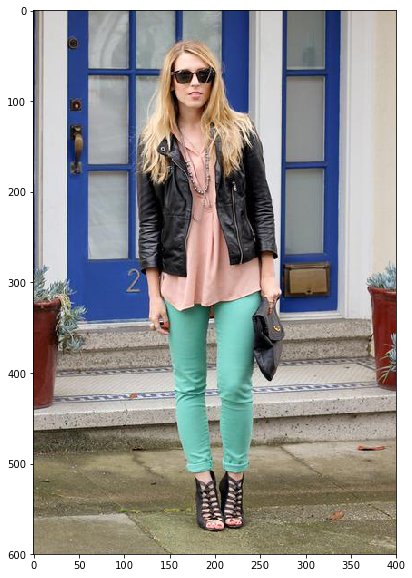

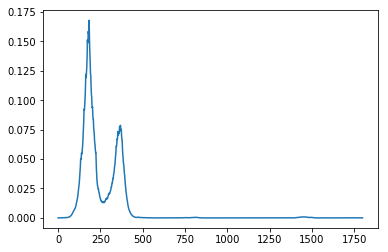

0.0332950631458


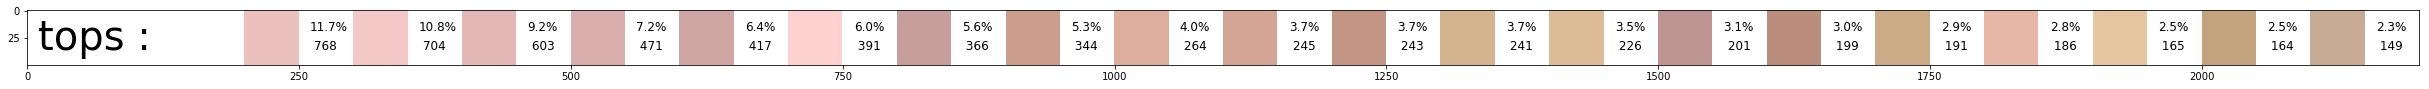

[ 75.7076278   13.60997247  11.40991129] 13065.0


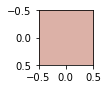

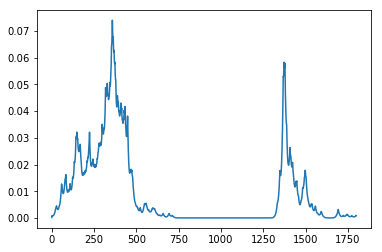

0.914214531008


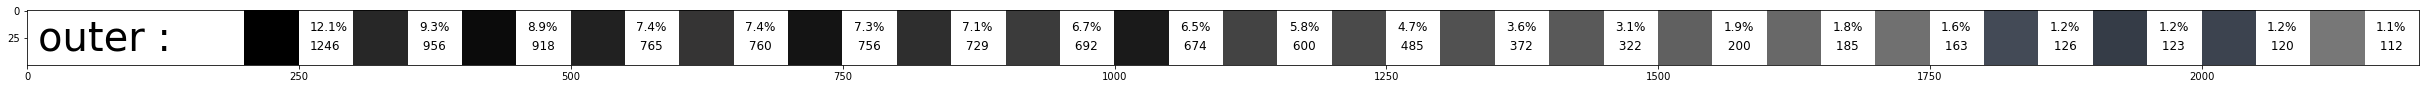

[ 17.80507855   0.          -0.28649068] 14851.0


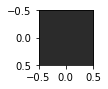

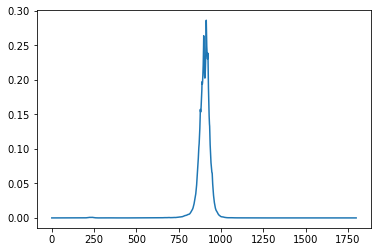

0.00674612098044


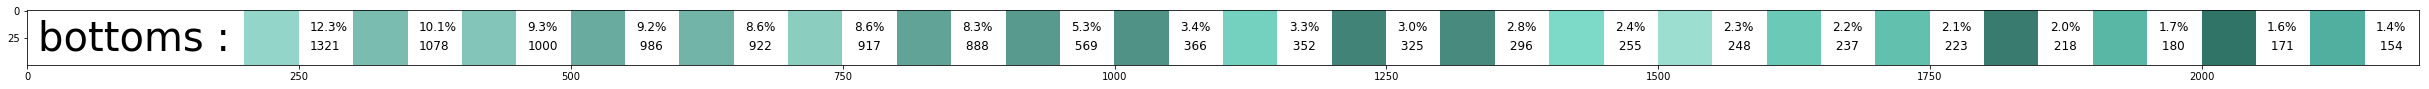

[ 69.44920019 -25.04688959   0.        ] 13341.0


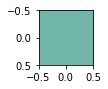

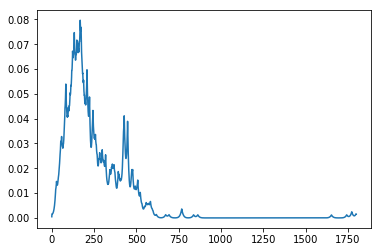

0.706318390399


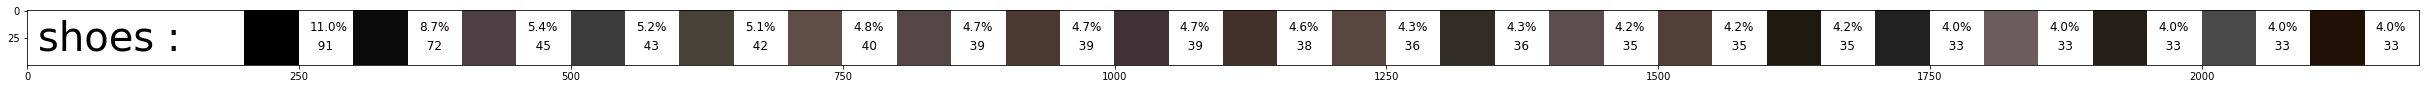

[ 20.22206473   3.4746988    3.09518072] 2833.0


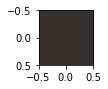

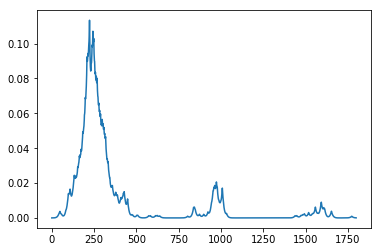

0.698417266187


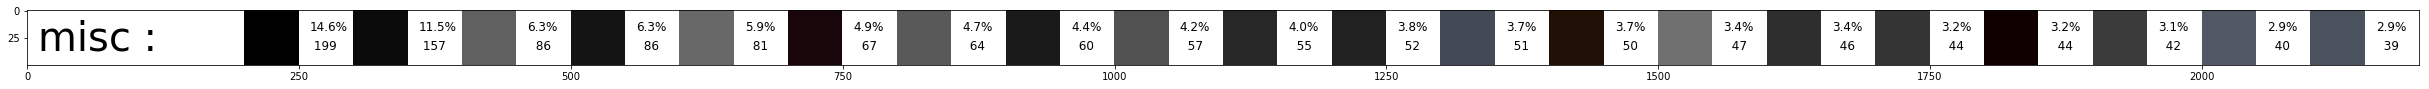

[ 18.01569201   0.82443307  -0.50475494] 3475.0


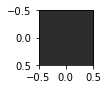

Lab :
 [[ 75.7076278   13.60997247  11.40991129]
 [ 17.80507855   0.          -0.28649068]
 [ 69.44920019 -25.04688959   0.        ]
 [ 20.22206473   3.4746988    3.09518072]
 [ 18.01569201   0.82443307  -0.50475494]]


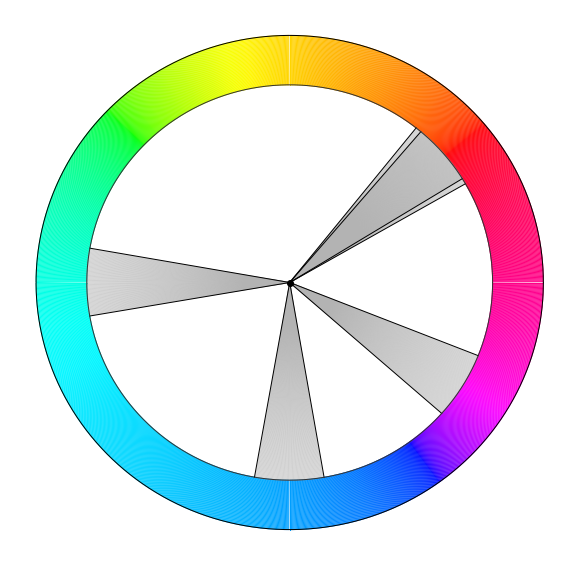

HVC :
 [[  3.99747636e+01   7.57076278e+01   1.77599951e+01]
 [  2.70000000e+02   1.78050786e+01   2.86490683e-01]
 [  1.80000000e+02   6.94492002e+01   2.50468896e+01]
 [  4.16939051e+01   2.02220647e+01   4.65335099e+00]
 [  3.28523161e+02   1.80156920e+01   9.66678554e-01]]
(0.0022353312030989956, 6, 9)
0.0 0 9
0.361646519189 6 9
0.571529493843 4 0
0.0 0 9
0.203029624808 6 9
T type
lowC
recommend [ 350.    33.    10.5]


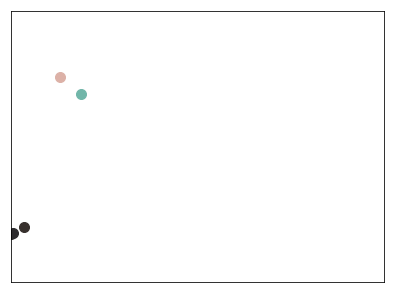

G1 lab : [ 69.44920019 -25.04688959   0.        ]
G2 lab : [ 33.          10.34048141  -1.82330587]


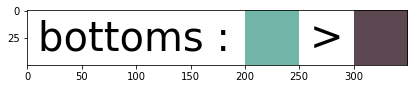

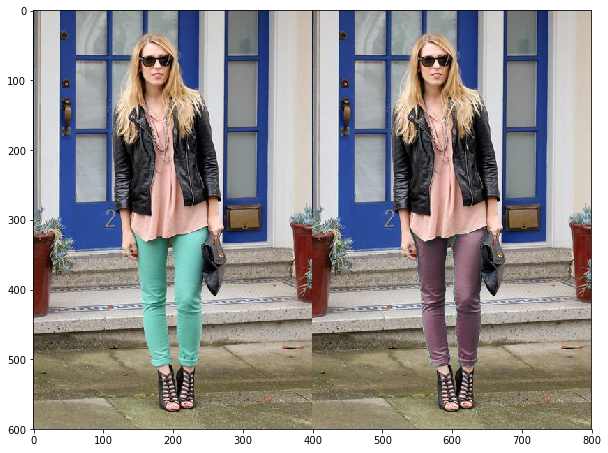

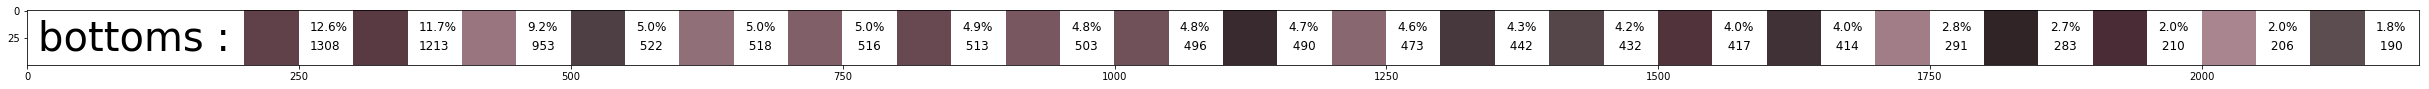

In [14]:
init_notebook_mode()

N = 32
M = 20
gray_thr = 10
dire = "data/"
Lmap_img = dire+"ex_Lmap.txt"
hum_img = dire+'ex.jpg'

img = np.array(Image.open(hum_img))
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

Lmap = np.loadtxt(Lmap_img,dtype='int')

img = excution2(img,Lmap,N,M,gray_thr)